MLP 이용 간단한 ANN을 만들어서 데이터석 진행 (KAN 비교용)

step1. Excel 데이터 가져오기

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np

filepath = r"C:\Users\kepco201\Desktop\KAN_python\pykan-master\github\workflows\TaeWoong\25.01.14_CO2RR_GSA.xlsx" # 엑셀 데이터 로드
xls = pd.ExcelFile(filepath)    # pd.ExcelFile(경로) --- path에 있는 엑셀파일을 읽는다


df_in = pd.read_excel(xls, sheet_name='Input')    # pd.read_excel 함수를 통해 수치형 데이터를 읽어온다
df_out = pd.read_excel(xls, sheet_name='Output')     # df_in = 입력 데이터  //  df_out = 출력 데이터


print("=== 데이터 타입 확인 ===")     
print("Input 데이터 타입:")
print(df_in.dtypes)      # .dtypes = 데이터 타입
print(f"Input 데이터 형태: {df_in.shape}")   # .shape = 데이터 행열 구조


selected_columns = [                      
    "Current density (mA/cm2)", 
    "Faradaic efficiency (%)", 
    "CO coversion",
    "Voltage (V)", 
    "Electricity cost ($/kWh)", 
    "Membrain cost ($/m2)",
    "Catpure energy (GJ/ton)", 
    "Crossover rate"
]


X = df_in[selected_columns].copy()      # 데이터[ 필요한 열 이름] 2501 * 정수 형태로 나올 것이다



# Y 데이터 선택 
Y = df_out[['Required energy_total (MJ/kgCO)']].values.reshape(-1, 1)  # MSP ($/kgCO)  # Required energy_total (MJ/kgCO) 
# 왜 reshape(-1. 1)을 하는것? --- 

print(f"\n=== 최종 데이터 형태 ===")
print(f"X 형태: {X.shape}")
print(f"Y 형태: {Y.shape}")
print(f"X 컬럼: {X.columns.tolist()}")












=== 데이터 타입 확인 ===
Input 데이터 타입:
Current density (mA/cm2)    float64
Faradaic efficiency (%)     float64
CO coversion                float64
Voltage (V)                 float64
Electricity cost ($/kWh)    float64
Membrain cost ($/m2)        float64
Catpure energy (GJ/ton)     float64
Crossover rate              float64
Unnamed: 8                  float64
Unnamed: 9                   object
Unnamed: 10                  object
Unnamed: 11                  object
Unnamed: 12                 float64
Unnamed: 13                  object
Unnamed: 14                 float64
Unnamed: 15                  object
Unnamed: 16                 float64
Unnamed: 17                  object
Unnamed: 18                 float64
Unnamed: 19                 float64
Unnamed: 20                  object
dtype: object
Input 데이터 형태: (2501, 21)

=== 최종 데이터 형태 ===
X 형태: (2501, 8)
Y 형태: (2501, 1)
X 컬럼: ['Current density (mA/cm2)', 'Faradaic efficiency (%)', 'CO coversion', 'Voltage (V)', 'Electricity cost ($/kWh)', '

step2. 데이터 분리 및 스케일링 _ 여기서는 평균 0 표준편차 1로 스케일링함

In [ ]:
# 1차 분할 (test 분리)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# 2차 분할(train, valid 분리)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2, random_state=42)

# train:valid:test = 64:16:20

# 데이터 스케일링

# **중요** : 스케일러는 반드시 *훈련 데이터(X_train)*에만 fit 해야한다. 그래야 valid나 test 데이터의 정보가 누출될 위험을 줄인다

scaler_X = MinMaxScaler(feature_range=(0.1, 0.9))
X_train_scaled = scaler_X.fit_transform(X_train)  # X_train 데이터를 이용해 scaler_X.transform을 학습 + X_train_scaled 반환
X_val_scaled = scaler_X.transform(X_val) # train 데이터로 학습한 scaler_X.transform 함수로 다른 것들도 학습
X_test_scaled = scaler_X.transform(X_test) 

scaler_Y = MinMaxScaler(feature_range=(0.1, 0.9))
Y_train_scaled = scaler_Y.fit_transform(Y_train)  # Y_train 데이터를 이용해 scaler_Y.transform을 학습 + Y_train_scaled 반환
Y_val_scaled = scaler_Y.transform(Y_val)
Y_test_scaled = scaler_Y.transform(Y_test)

# 분리한 결과 어떻게 나오는지 확인해보기

print("\n--- 데이터 분할 및 전처리 최종 결과 ---")
print(f"훈련 데이터 형태: X({X_train_scaled.shape}), Y({Y_train_scaled.shape})")
print(f"검증 데이터 형태: X({X_val_scaled.shape}), Y({Y_val_scaled.shape})")
print(f"테스트 데이터 형태: X({X_test_scaled.shape}), Y({Y_test_scaled.shape})")

print("\n\n 스케일링된 훈련 데이터(X_train_scaled) 샘플:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())  
# .head()는 첫번째 5줄만 출력 , numpy 배열은 컬럼명이 없어 데이터 구조가 한눈에 파악하기 어렵다. 
# 그래서 pd.DataFrame(..., columns=...)을 이용하면, 스케일링된 데이터를 원래 컬럼명과 함께 보기 좋게 pandas DataFrame으로 변환 이용


--- 데이터 분할 및 전처리 최종 결과 ---
훈련 데이터 형태: X((1600, 8)), Y((1600, 1))
검증 데이터 형태: X((400, 8)), Y((400, 1))
테스트 데이터 형태: X((501, 8)), Y((501, 1))


 스케일링된 훈련 데이터(X_train_scaled) 샘플:
   Current density (mA/cm2)  Faradaic efficiency (%)  CO coversion  \
0                  1.441673                 0.360241      0.532953   
1                 -0.926417                -1.171090     -0.246477   
2                  0.172068                 0.046016     -1.299123   
3                 -0.875356                -0.994082      1.391436   
4                  1.623833                -1.276747      1.126541   

   Voltage (V)  Electricity cost ($/kWh)  Membrain cost ($/m2)  \
0    -0.358187                  1.459581             -0.498390   
1     0.537111                  0.955127              1.237291   
2     1.189616                  0.946880             -1.165533   
3    -0.278176                 -1.075060             -0.520536   
4     0.286041                 -0.100515             -1.697034   

   Catp

step3. MLP(ANN) 구조 설계 및 여러 신경망 층 구조에 대한 GridSearchCV 진행을 통해 최적 구조 찾기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from scikeras.wrappers import KerasRegressor  # scikeras 권장
from sklearn.model_selection import GridSearchCV






# 1. 모델 생성 함수 정의 / units1 = hidden layer 1층 / units2 = hidden layer 2층
def create_ann_model(units1=32, units2=16, activation='relu'):     
    model = Sequential([
        Input(shape=(8,)),             # 입력 특성 8개
        Dense(units1, activation=activation),  # hidden layer (units1)개
        Dense(units2, activation=activation),  # 입력 특성 8개 (units2)개
        Dense(1, activation='linear')
    ])
    
    
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',   # loss function = MSE -- 이것에 따라 학습의 방향이 결정됨
        metrics=['mean_absolute_error']  # 학습에 영향은 주지 않지만 그냥 평가지표 MAE
    )
    return model  


# 2. 래퍼 정의 (scikeras)     
regressor = KerasRegressor(    # Keras로 만든 딥러닝 모델을 Scikit-learn의 회귀(Regressor) 모델처럼 보이게 포장 --- scikit-learn의 최적의 units 수 등을 찾는 gridsearchCV 같은 기능을 쓰기 가능
    model=create_ann_model,    
    verbose=0                  # verbose = 0 --- 모델 훈련과정 출력 X // 1 -- 출력  //  2 -- epoch 끝날때마다 출력
)



# 3. 모델 생성 및 구조 확인
# Required energy_total 예측 모델
#ann_model = create_ann_model()

# 모델의 구조를 요약하여 출력합니다.
#print("--- 'Required energy_total' 예측 모델 구조 ---")
#ann_model.summary()







# 4. GridSearchCV를 통해 검사할 놈들 결정 .. 나중에 GridSearchCV.fit()을 통해 학습 예정
grid = GridSearchCV(
    estimator = KerasRegressor( model=create_ann_model,verbose=0),   # Keras로 만든 딥러닝 모델을 Scikit-learn의 회귀(Regressor) 모델처럼 보이게 포장 --- scikit-learn의 최적의 units 수 등을 찾는 gridsearchCV 같은 기능을 쓰기 가능    
                                                                     # verbose = 0 --- 모델 훈련과정 출력 X // 1 -- 출력  //  2 -- epoch 끝날때마다 출력
    param_grid= {
        'model__units1': [16, 32],                    # hidden layer 1층 뉴런수 
        'model__units2': [8, 16],                     # hidden layer 2층 뉴런수
        'model__activation': ['relu', 'tanh'],        # 활성화함수
        'batch_size': [32],                           # 배치 사이즈
        'epochs': [100],                              # 학습 epoch 수  --- 총 학습 수 = 2*2*2 = 8 이다.
    },
    cv=3,                              # cross validation 3번 (3 fold validation)  --- 총 학습 수 = 8*3 = 24
    scoring='neg_mean_squared_error',  # -MSE가 높을수록 좋다고 설정
    n_jobs=-1                          # 사용 가능한 CPU 코어 전부 사용하라는 의미
)



grid_result = grid.fit(X_train_scaled, Y_train_scaled)   # GridSearchCV.fit() 실행하기 -- 여러 모델 구조 비교 --- 여러 정보가 grid_result에 할당이 됨


# 6. 결과 출력
print("최적 하이퍼파라미터:", grid_result.best_params_)
print("최적 평균 검증 MSE:", -grid_result.best_score_)  # 아까 score = -MSE로 정의함




# 7. 최적 파라미터 추출 / best_params에 저장되어 있는 최적 정보들 활용
optimal_units1 = grid_result.best_params_['model__units1']                   # best_params[키] = 밸류값 출력
optimal_units2 = grid_result.best_params_['model__units2'] 
optimal_activation = grid_result.best_params_['model__activation']
optimal_batch_size = grid_result.best_params_['batch_size']






# GridSearchCV.fit() 을 실행했을 때 과정
cv_results = pd.DataFrame(grid_result.cv_results_)  # 결과표를 pandas dataframe으로 변환 --- 그러면 보기 편함

print("\n=== GridSearchCV 상세 결과 ===")   
print(cv_results[['params', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False)) # grid_result.cv_results_ 의 값 중 3개의 변수만 뽑아서 보기
# .sort_values =pandas.DataFrame을 특정 열의 값을 기준으로 재배치
#  mean_test_score을 기준으로 ascending=False: 내림차순 정렬 -- 성능이 가장 좋은 것이 위로 간다



# 9. 최적 모델 구조 보여주기
print(f"최적 모델 구조:8- {optimal_units1}-{optimal_units2}, activation: {optimal_activation}, -1")




# 7. (선택) 결과 table을 보기 좋게 정리
# import pandas as pd
# cv_results = pd.DataFrame(grid_result.cv_results_)
# display(cv_results.sort_values('mean_test_score', ascending=False))


최적 하이퍼파라미터: {'batch_size': 32, 'epochs': 100, 'model__activation': 'tanh', 'model__units1': 32, 'model__units2': 16}
최적 평균 검증 MSE: 0.13615171903695308

=== GridSearchCV 상세 결과 ===
                                              params  mean_test_score  \
7  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.136152   
6  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.143459   
5  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.149892   
4  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.167739   
2  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.252084   
3  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.255975   
0  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.259916   
1  {'batch_size': 32, 'epochs': 100, 'model__acti...        -0.263603   

   std_test_score  
7        0.022299  
6        0.057834  
5        0.055976  
4        0.047210  
2        0.066794  
3        0.069328  
0        0.076156  
1  

step4. 모델 학습 및 plot

--- 모델 학습을 시작합니다 ---
Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4328 - mean_absolute_error: 0.6766 - val_loss: 0.8266 - val_mean_absolute_error: 0.3977
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7948 - mean_absolute_error: 0.4167 - val_loss: 0.7531 - val_mean_absolute_error: 0.4301
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5894 - mean_absolute_error: 0.4117 - val_loss: 0.7415 - val_mean_absolute_error: 0.4528
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5651 - mean_absolute_error: 0.4297 - val_loss: 0.7445 - val_mean_absolute_error: 0.4506
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7029 - mean_absolute_error: 0.4548 - val_loss: 0.7386 - val_mean_absolute_error: 0.4443
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6294 - mean_absolute_error: 0.4395 - val_loss: 0.7368 - val_mean_absolute_error: 0.4328
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6545 - mean_absol

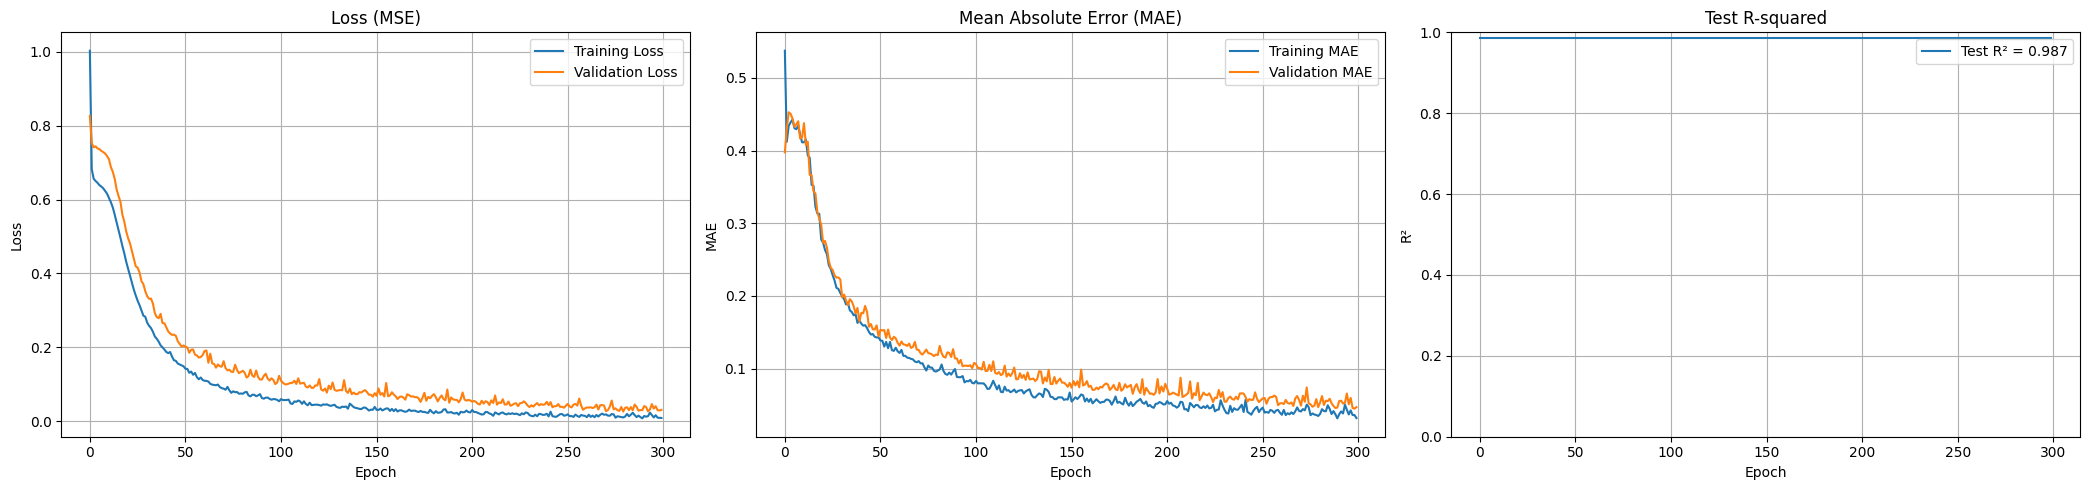

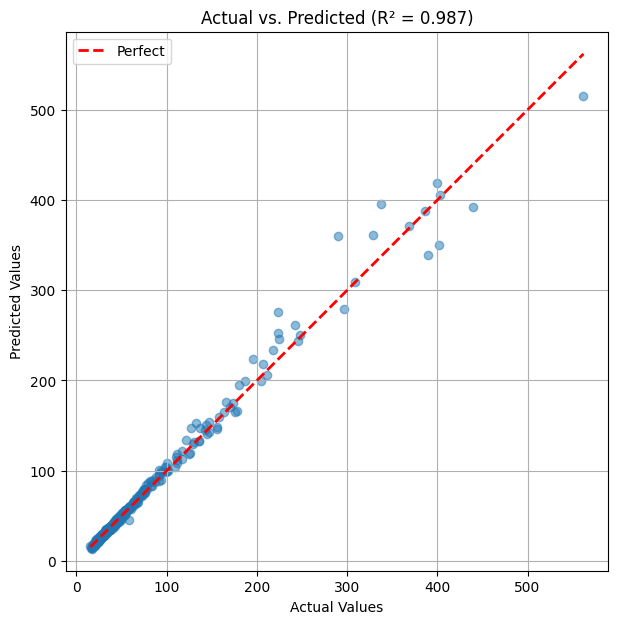

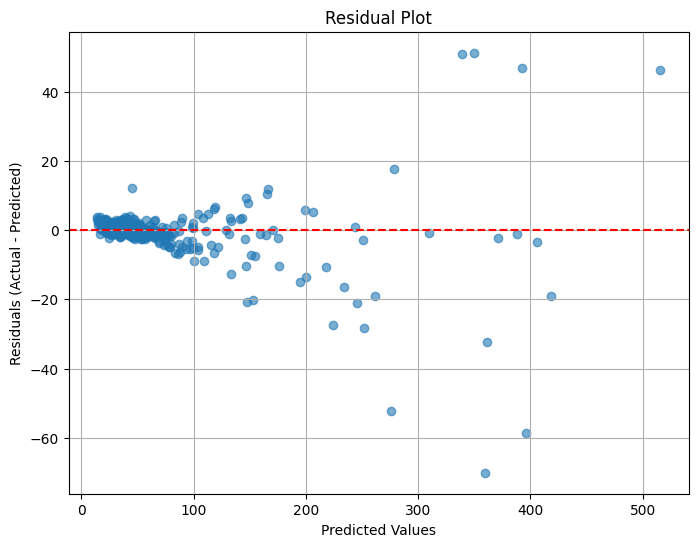


=== 최종 모델 성능 요약 ===
모델 구조: 8-32-16-1
활성화 함수: tanh
최적 epoch: 280
테스트 R²: 0.9868
테스트 MAE: 0.0397


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping





def create_optimal_model():
    model = Sequential([
        Input(shape=(8,)),
        Dense(optimal_units1, activation=optimal_activation),
        Dense(optimal_units2, activation=optimal_activation),
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    return model

ann_model = create_optimal_model() # 100 epoch 기준 최적 모델 구조 생성




print("--- 모델 학습을 시작합니다 ---")  

early_stopping = EarlyStopping( # 최적 모델 학습 (Training)
    monitor='val_loss',         # 검증 손실 기준 = val_loss = validation set의 RMSE
    patience=20,                # 개선되지 않는 epoch 20회 동안 기다리기(8~20 추천)
    restore_best_weights=True   # 가장 좋은 가중치로 복원
)


history = ann_model.fit(
    X_train_scaled, 
    Y_train_scaled,
    epochs=1000, #충분히 큰 값으로 설정
    batch_size=optimal_batch_size, #  # GridSearchCV 결과 활용 --- 아까 32라고 정의
    validation_data=(X_val_scaled, Y_val_scaled),
    callbacks=[early_stopping],  # callback 중 1개인 Early_stopping 이용/ overfitting 뜨기 전에 earlystopping 으로 끊기
    verbose=1 # 각 epoch마다 진행상황 표현
)
print("\n--- 모델 학습 완료 ---")






 





# 3. 모델 성능 평가 (Evaluation)
print("\n--- 테스트 데이터 이용 모델 성능 평가 ---")
test_loss, test_mae = ann_model.evaluate(X_test_scaled, Y_test_scaled, verbose=0) # evaluate 함수 이용 / verbose = 0 이라 평과과정 출력 X / model을 compile 할 떄 정의한 loss 와 metrics 출력
print(f"테스트 데이터 손실 (MSE): {test_loss:.4f}")
print(f"테스트 데이터 평균 절대 오차 (MAE): {test_mae:.4f}")




# 예측한 값 출력
Y_pred_scaled = ann_model.predict(X_test_scaled)   # predict(입력변수) 함수는 모델의 출력값(예측값) 출력
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled) # 역변환을 통해 Y_pred를 구함
Y_test_true = Y_test          # 가독성을 위해...

# 상관계수 R^2 출력
r2 = r2_score(Y_test_true, Y_pred)   # r2_score 함수를 이용해 결정계수 R^2을 구함
print(f"테스트 데이터 결정계수 (R²): {r2:.4f}")  # r2를 소수점 뒤에 4자리까지만 출력


# best_epoch 출력 + 최소 val_loss 출력
best_epoch = np.argmin(history.history['val_loss']) + 1  # 가장 val_loss 가 낮았던 epoch 수를 찾기 // np.argmin 함수는 리스트에서 가장 작은 값의 인덱스(위치) 출력
print(f"최적의 epoch: {best_epoch}")                      # 위에 것을 이어 쓰자면 model.fit.history이다. 뒤의 .history를 통해 모든 훈련과정의 기록(log)를 출력 // 그 중 val_loss 만 뽑아서 보기 -- 그 중 가장 작은 값의 인덱스 출력 np.argmin
print(f"최소 val_loss: {history.history['val_loss'][best_epoch-1]:.5f}") # .history에서 np.argmin까지 하면 index 번호에 자동으로 +1을 해서 인간이 보기 편하도록 출력을 해줌 --- -1 해줘서 index 번호 넣어주기








# 5. 학습 과정 시각화 (Loss, MAE, R²)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))   # plt.subplots(1, 3) = 1행 3열로 전체 그래프 부분 나누기  // figsize는 전체 그래프 크기 // 전체 그래프 구간을 나눠서 각각 할당해서 그릴 때 subplot 이용

# ax1 = 첫번쨰 그림판 --  Loss 그래프 그리기
ax1.plot(history.history['loss'], label='Training Loss')   # 참고로 history = model.fit() 이라고 앞에서 정의를 해놓음 // 범례(legend)를 Training loss 라 이름지음
ax1.plot(history.history['val_loss'], label='Validation Loss')  # model.fit이 진행될때마다 loss 와 val_loss를 그리기
ax1.set_title('Loss (MSE)')  # set_title = 그래프 제목
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss'); ax1.legend(); ax1.grid(True) # .legend() --- 아까 label로 이름 붙여놓은 애들 표시 // .grid(True) -- 격자무늬 추가


# ax2 = MAE
ax2.plot(history.history['mean_absolute_error'], label='Training MAE')   # 아까 model.compile 할 떄 MAE 미리 선언함
ax2.plot(history.history['val_mean_absolute_error'], label='Validation MAE')  # Keras는 자동으로 validation set의 키 값 앞에 접두사 val_을 붙여준다
ax2.set_title('Mean Absolute Error (MAE)')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('MAE'); ax2.legend(); ax2.grid(True)

# ax3 = R² 수기계산(별도 그래프)
ax3.plot([r2]*len(history.history['loss']), label=f'Test R² = {r2:.3f}') # r2를 총 epoch 수만큼 만듦 -- 그래프 직선형으로 그리려고
ax3.set_title('Test R-squared')
ax3.set_xlabel('Epoch'); ax3.set_ylabel('R²'); ax3.legend(); ax3.grid(True)
ax3.set_ylim(bottom=0, top=1)

plt.tight_layout() # layout 자동으로 깔끔하게 그래프 보여줌
plt.show()  # 화면에 그래프 출력









# 6. 실제값-예측값 산점도
plt.figure(figsize=(7,7))
plt.scatter(Y_test_true, Y_pred, alpha=0.5) # alpha는 투명도를 의미 .scatter()을 통해 산점도 그리기 . x 값은 실제값 y 값은 예측값

# y = x 기준선 그리기
plt.plot([Y_test_true.min(), Y_test_true.max()],  # 선의 시작과 끝점 x좌표 
         [Y_test_true.min(), Y_test_true.max()], 'r--', lw=2, label='Perfect') # 선의 시작과 끝점 y좌표 --- x좌표와 같으므로 y = x 그래프를 그린다  # lw = linewidth = 선 굵기
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted (R² = {r2:.3f})")
plt.legend(); plt.grid(True); plt.axis('equal') #plt.axis('equal')을 통해 y=x에 
plt.show()



# 7. 잔차 플롯 (residuals)
residuals = (Y_test_true.flatten() - Y_pred.flatten())   # residuals = 실제값 - 예측값
plt.figure(figsize=(8,6))    # 그래프 크기
plt.scatter(Y_pred, residuals, alpha=0.6)  # x축 값 = 예측값, y축 값 = (실제값- 예측값)
plt.axhline(0, color='red', linestyle='--') # axhline = 수평선(Axis Horizontal Line)**을 그리는 함수
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True) # 뒤에 격자 표시
plt.show()



# 모델 성능 요약 
print(f"\n=== 최종 모델 성능 요약 ===")
print(f"모델 구조: 8-{optimal_units1}-{optimal_units2}-1")
print(f"활성화 함수: {optimal_activation}")
print(f"최적 epoch: {best_epoch}")
print(f"테스트 R²: {r2:.4f}")
print(f"테스트 MAE: {test_mae:.4f}")

